In [3]:
TrainingImagePath='/content/drive/MyDrive/Face Images/Final Training Images'

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator()
training_set = train_datagen.flow_from_directory( TrainingImagePath,target_size=(64, 64),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(TrainingImagePath,target_size=(64, 64),batch_size=32,class_mode='categorical')
test_set.class_indices
'''############ Creating lookup table for all faces ############'''
TrainClasses=training_set.class_indices
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
print("Mapping of Face and its ID",ResultMap)
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
import time
StartTime=time.time()

classifier.fit_generator(
                    training_set,
                    epochs=15,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

classifier.save("model.h5")
'''########### Making single predictions ###########'''
import numpy as np
from keras.utils import load_img,img_to_array
from keras.models import load_model

ImagePath='/content/drive/MyDrive/Face Images/Final Testing Images/face16/3face16.jpg'
test_image=load_img(ImagePath,target_size=(64, 64))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
model = load_model('model.h5')
result=model.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('Prediction is: ',ResultMap[np.argmax(result)])

Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.
Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}

 The Number of output neurons:  16


<ipython-input-3-862e4c9c4031>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 49.2011 - accuracy: 0.0738 

8/8 [==============================] - 143s 17s/step - loss: 49.2011 - accuracy: 0.0738 - val_loss: 3.7933 - val_accuracy: 0.0697
Epoch 2/15
8/8 [==============================] - 4s 545ms/step - loss: 3.0177 - accuracy: 0.1148
Epoch 3/15
8/8 [==============================] - 3s 321ms/step - loss: 2.4849 - accuracy: 0.2459
Epoch 4/15
8/8 [==============================] - 3s 310ms/step - loss: 1.6110 - accuracy: 0.5205
Epoch 5/15
8/8 [==============================] - 3s 385ms/step - loss: 0.7985 - accuracy: 0.7746
Epoch 6/15
8/8 [==============================] - 3s 315ms/step - loss: 0.3206 - accuracy: 0.9180
Epoch 7/15
8/8 [==============================] - 3s 324ms/step - loss: 0.2027 - accuracy: 0.9508
Epoch 8/15
8/8 [==============================] - 3s 350ms/step - loss: 0.2367 - accuracy: 0.9262
Epoch 9/15
8/8 [==============================] - 4s 522ms/step - loss: 0.0977 - accuracy: 0.9877
Epoch 10/15
8/8 [==============================] - 3s 339ms/step - loss: 0.0843 - accu

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction is:  face16


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


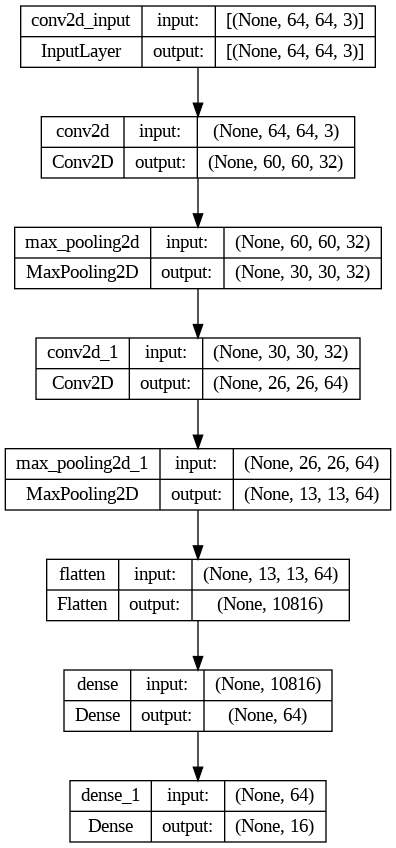

In [4]:
from keras.utils import plot_model

plot_model(classifier, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
